MANASA S T
2547133

# ADVANCED PYTHON PROGRAMMING

## LAB 1 


Apply 3D visualization concepts

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

1. Import the “mortality” dataset.



In [42]:
df = pd.read_csv('MortalityDataset.csv')

In [43]:
alive_data = df[df['MORT'] == 'alive']
dead_data = df[df['MORT'] == 'dead']

2. Generate an image of four scatter plots(2D plot for alive, 2D plot for notalive, 3D plot
for alive, 3D plot for notalive)

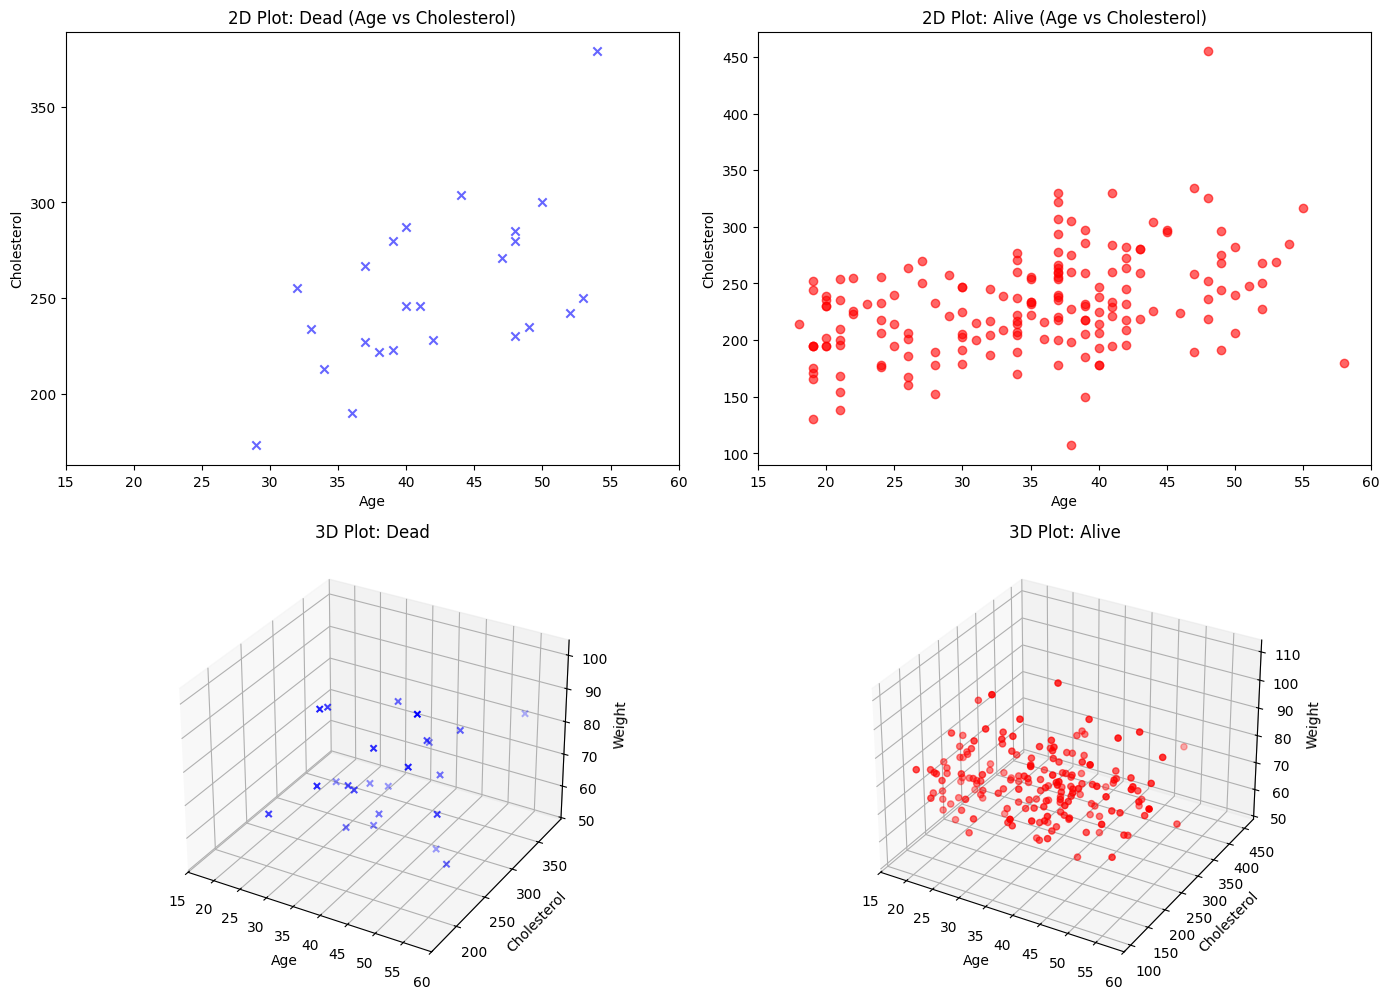

In [44]:
fig = plt.figure(figsize=(14, 10))


ax2 = fig.add_subplot(2, 2, 1)
ax2.set_xlim(15, 60)
ax2.scatter(dead_data['AGE'], dead_data['CHOL'], c='blue', marker='x', alpha=0.6)
ax2.set_title('2D Plot: Dead (Age vs Cholesterol)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Cholesterol')

#age combined with high cholesterol increases mortality risk.
ax1 = fig.add_subplot(2, 2, 2)
ax1.scatter(alive_data['AGE'], alive_data['CHOL'], c='red', marker='o', alpha=0.6)
ax1.set_title('2D Plot: Alive (Age vs Cholesterol)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Cholesterol')
ax1.set_xlim(15, 60)


ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(dead_data['AGE'], dead_data['CHOL'], dead_data['WEIGHT'],c='blue', marker='x')
ax3.set_title('3D Plot: Dead')
ax3.set_xlabel('Age')
ax3.set_ylabel('Cholesterol')
ax3.set_zlabel('Weight')
ax3.set_xlim(15, 60)

ax4= fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(alive_data['AGE'], alive_data['CHOL'], alive_data['WEIGHT'], c='red', marker='o')
ax4.set_title('3D Plot: Alive')
ax4.set_xlabel('Age')
ax4.set_ylabel('Cholesterol')
ax4.set_zlabel('Weight')
ax4.set_xlim(15, 60)

plt.tight_layout()
plt.show()

3. Generate an image of four bar plots(3D plot for BLOOD-A , 3D plot for BLOOD-B, 3D
plot for BLOOD-AB, 3D plot for BLOOD-O)

/var/folders/0z/v3sdyt153lq3dbr23_yy2pxc0000gn/T/ipykernel_38075/1206290362.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


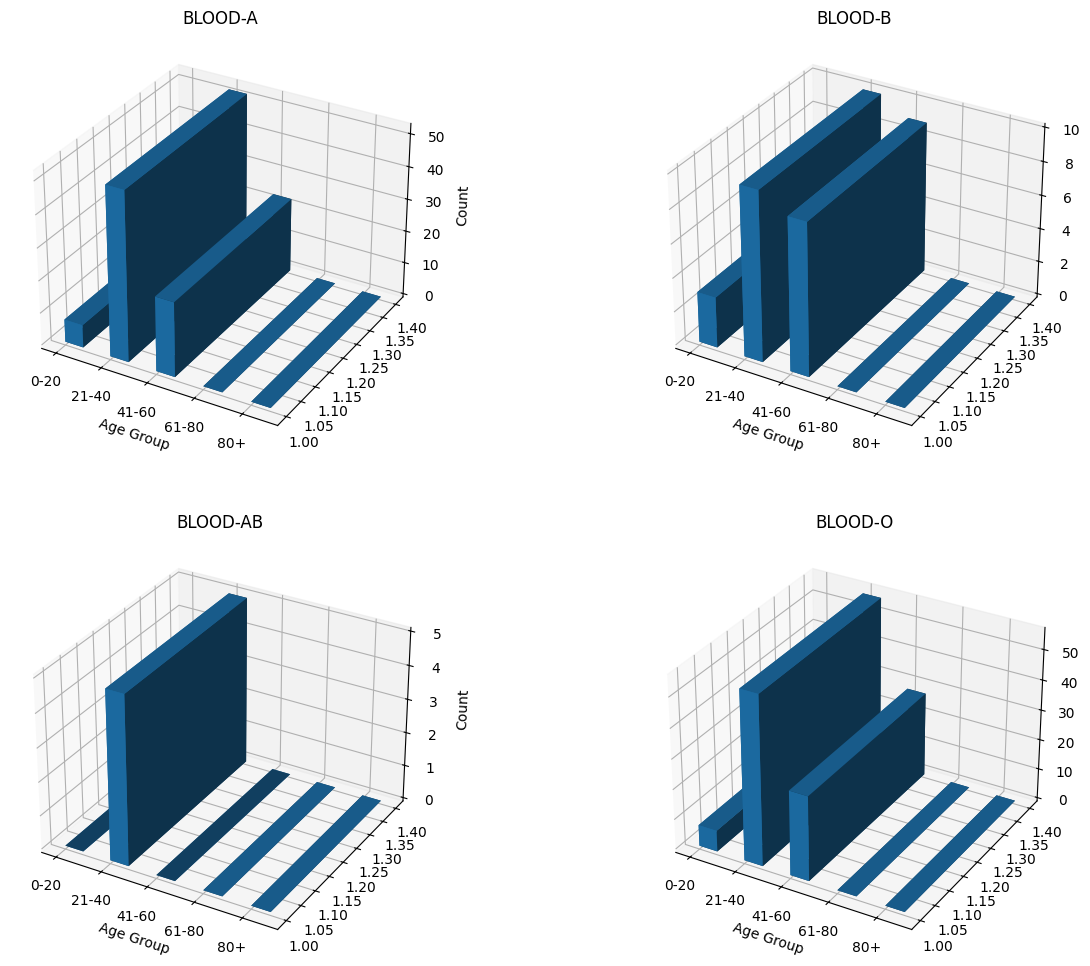

In [45]:
# Load dataset
df = pd.read_csv("MortalityDataset.csv")

# Define age groups
bins = [0, 20, 40, 60, 80, 120]
labels = ['0-20', '21-40', '41-60', '61-80', '80+']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels)

blood_groups = ['a', 'b', 'ab', 'o']

fig = plt.figure(figsize=(15, 12))

for i, blood in enumerate(blood_groups, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')

    xpos = []
    ypos = []
    zpos = np.zeros(len(labels))
    dz = []

    for x, age in enumerate(labels):
            count = len(df[
                (df['BLOOD'] == blood) &
                (df['AGE_GROUP'] == age) 
               
            ])
            xpos.append(x)
            ypos.append(y)
            dz.append(count)

    xpos = np.array(xpos)
    ypos = np.array(ypos)
    dx = dy = 0.4
    dz = np.array(dz)

    ax.bar3d(xpos, ypos, zpos, dx,dy, dz)

    ax.set_title(f'BLOOD-{blood.upper()}')
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_xlabel('Age Group')
    ax.set_zlabel('Count')

plt.tight_layout()
plt.show()


4. Explore the Basemap library documentation. Draw any 10 types of plot using
various functions. Make sure each graph is drawn using a unique function.

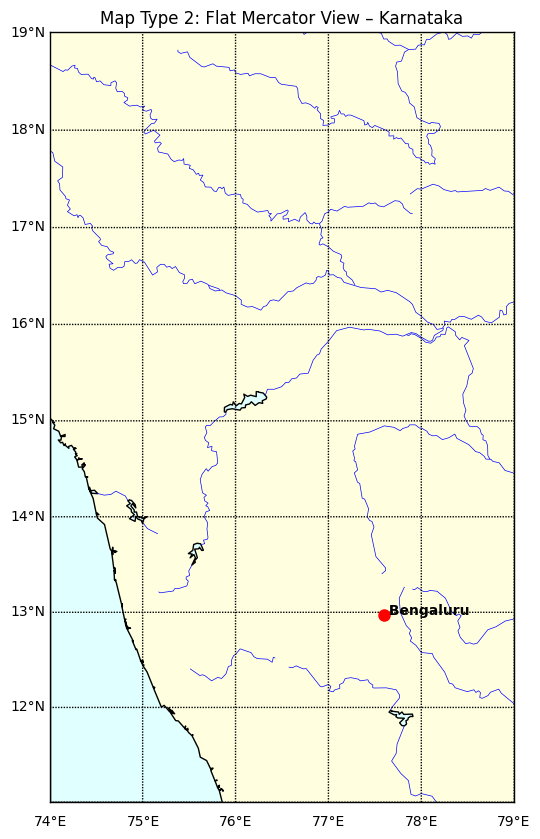

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

plt.figure(figsize=(12, 10))

# Karnataka region bounds
m = Basemap(projection='merc',
            llcrnrlat=11, urcrnrlat=19,    # Karnataka latitude range
            llcrnrlon=74, urcrnrlon=79,    # Karnataka longitude range
            resolution='i')

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='blue', linewidth=1)
m.drawrivers(color='blue', linewidth=0.5)
m.drawmapboundary(fill_color='lightcyan')
m.fillcontinents(color='lightyellow', lake_color='lightcyan')

m.drawparallels(np.arange(10, 20, 1), labels=[1,0,0,0])
m.drawmeridians(np.arange(73, 80, 1), labels=[0,0,0,1])

m.shadedrelief()


x, y = m(77.5946, 12.9716)   # Longitude, Latitude of Bengaluru
m.plot(x, y, 'ro', markersize=8)
plt.text(x, y, ' Bengaluru', fontweight='bold')

plt.title("Map Type 2: Flat Mercator View – Karnataka")
plt.show()


# Demonstrate Plots with Maps

1. Identify the district-wise COVID death details of any state from the authorized
source for a particular month/day of 2024.


In [47]:
import geopandas as gpd 
import matplotlib.colors as colors

In [48]:
gdf1 = gpd.read_file("mh1.geojson")
gdf2 = gpd.read_file("mh2.geojson")

gdf_districts = pd.concat([gdf1, gdf2], ignore_index=True)
gdf_districts.head()

,SUB_DIST,DISTRICT,STATE,TYPE,NAME,CEN_2001,geometry
0,Gondia,Gondia,Maharashtra,village,Chargaon,275070404601276600,"POLYGON ((80.24985 21.55813, 80.25095 21.55817..."
1,Gondia,Gondia,Maharashtra,village,Birsola,275070404601271200,"POLYGON ((80.2156 21.62781, 80.21473 21.62735,..."
2,Gondia,Gondia,Maharashtra,village,Kasa,275070404601271100,"POLYGON ((80.19456 21.6192, 80.19247 21.61942,..."
3,Gondia,Gondia,Maharashtra,village,Bhadyatola,275070404601271300,"POLYGON ((80.2156 21.62781, 80.21568 21.62747,..."
4,Gondia,Gondia,Maharashtra,village,Satona,275070404601275100,"POLYGON ((80.2459 21.62143, 80.24654 21.62188,..."


In [49]:
print(gdf_districts.columns)


Index(['SUB_DIST', 'DISTRICT', 'STATE', 'TYPE', 'NAME', 'CEN_2001',
       'geometry'],
      dtype='object')


2. Fetch the corresponding state map details from the “State Geographical Information
System” portal.

In [50]:
df = pd.read_csv('Maharastra.csv')
print(df.head)

<bound method NDFrame.head of      Districts  Positive Cases  Active Cases  Recovered  Deceased  \
0   Ahmednagar          377661            16     370403      7242   
1        Akola           66181             0      64711      1470   
2     Amravati          105943             0     104320      1623   
3   Aurangabad          176521             3     172234      4284   
4         Beed          109179             3     106293      2883   
5     Bhandara           67941             0      66799      1142   
6     Buldhana           92008             1      91171       836   
7   Chandrapur           98820             0      97228      1592   
8        Dhule           50751             0      50081       670   
9   Gadchiroli           36977             1      36251       725   
10      Gondia           45421             1      44833       587   
11     Hingoli           22172             2      21656       514   
12     Jalgaon          149525             0     146764      2761   
13  

In [51]:
gdf_districts['district_norm'] = gdf_districts['DISTRICT'].str.lower().str.strip()
df['district_norm'] = df['Districts'].str.lower().str.strip()


In [57]:
gdf_district_level = gdf_districts.dissolve(
    by='district_norm',
    as_index=False
)

In [58]:
gdf_merged = gdf_district_level.merge(
    df,
    on='district_norm',
    how='left'
)

print(gdf_merged.head())


  district_norm                                           geometry  \
0    ahmadnagar  MULTIPOLYGON (((73.29698 19.07493, 73.29705 19...   
1         akola  MULTIPOLYGON (((76.787 20.29781, 76.78727 20.2...   
2      amravati  POLYGON ((76.80936 21.18648, 76.80763 21.18627...   
3    aurangabad  MULTIPOLYGON (((74.88156 19.65448, 74.88086 19...   
4          beed  POLYGON ((75.1639 18.66838, 75.16337 18.6658, ...   

          SUB_DIST    DISTRICT        STATE     TYPE       NAME  \
0         Shevgaon  Ahmadnagar  Maharashtra  village      Mungi   
1       Murtijapur       Akola  Maharashtra  village    Jitapur   
2  Anjangaon Surji    Amravati  Maharashtra  village  Murha Bk.   
3           Kannad  Aurangabad  Maharashtra  village     Digaon   
4            Parli        Beed  Maharashtra  village    Borkhed   

             CEN_2001   Districts  Positive Cases  Active Cases  Recovered  \
0  275220420703272600         NaN             NaN           NaN        NaN   
1  27501039920052390

3. Plot the district-wise COVID death details in a state map with proper formatting
using GeoPandas.

/var/folders/0z/v3sdyt153lq3dbr23_yy2pxc0000gn/T/ipykernel_84642/3110763821.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('OrRd')
/var/folders/0z/v3sdyt153lq3dbr23_yy2pxc0000gn/T/ipykernel_84642/3110763821.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_merged.geometry.centroid.x,
/var/folders/0z/v3sdyt153lq3dbr23_yy2pxc0000gn/T/ipykernel_84642/3110763821.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_merged.geometry.centroid.y,


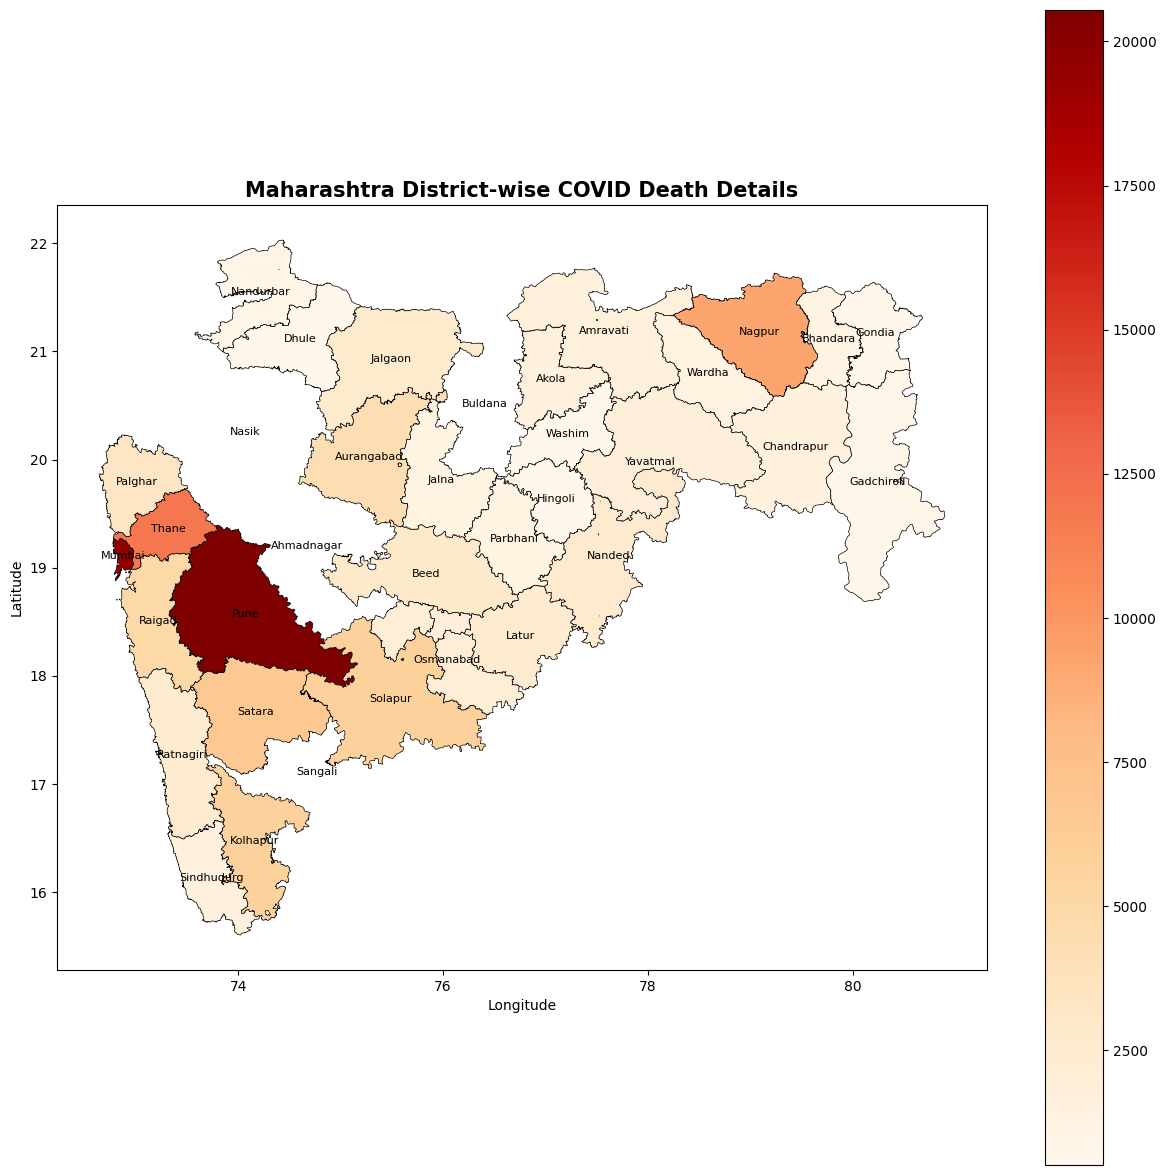

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Color map
cmap = plt.cm.get_cmap('OrRd')
cmap.set_bad(color='lightgrey')

# Normalize deaths
normalize = colors.Normalize(
    vmin=gdf_merged['Deceased'].min(),
    vmax=gdf_merged['Deceased'].max()
)

# Plot district-wise COVID deaths
gdf_merged.plot(
    column='Deceased',
    cmap=cmap,
    norm=normalize,
    ax=ax,
    legend=True,
    edgecolor='black',
    linewidth=0.5
)

# Add district labels (use DISTRICT column)
for x, y, label in zip(
    gdf_merged.geometry.centroid.x,
    gdf_merged.geometry.centroid.y,
    gdf_merged['DISTRICT']
):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Titles and labels
ax.set_title(
    'Maharashtra District-wise COVID Death Details',
    fontdict={'fontsize': 15, 'fontweight': 'bold'}
)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


4. Provide the source URL of state COVID details and shapefile in the comment
statement.

In [ ]:
# covid dataset : https://www.kaggle.com/datasets/anandhuh/latest-covid19-cases-maharashtra-india?resource=download
# state information : https://projects.datameet.org/indian_village_boundaries/mh/?utm_